# Tech Challenge - Fase 01

A descrição do desafio está dentro do arquivo [README.md](README.md).

### Bibliotecas

Lista das bibliotecas utilizadas para o projeto.

In [71]:
# Para carregar e manipular os dados
import pandas as pd
import numpy as np

# Para treinamento dos modelos
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

# Para validação dos modelos
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
from sklearn.calibration import cross_val_predict
from sklearn.model_selection import GridSearchCV

# Para visualização
import seaborn as sns
import matplotlib.pyplot as plt

# Para transformação dos dados
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler                             

# Para salvar o modelo
import pickle

# Define configurações dos gráficos
plt.style.use('ggplot')
sns.set_style('darkgrid')

### Vídeo explicativo

Abaixo o link do vídeo onde o grupo explica o desenvolvimento do desafio.

`COLOCAR O LINK AQUI`

### Obtenção dos dados

Foi feito uma pesquisa e encontramos um conjunto de dados de dados de [seguro de saúde](https://gist.github.com/meperezcuello/82a9f1c1c473d6585e750ad2e3c05a41).

O arquivo foi salvo em [dados/insurance.csv](dados/insurance.csv).


### Análise exploratória dos dados

Dicionário de dados:

- **age**: Variável que representa a idade da pessoa.
- **sex**: Variável que representa o gênero da pessoa (Masculino ou Feminino).
- **bmi**: Variável que representa o índice de massa corpórea (IMC) da pessoa.
- **children**: Variável que representa a quantidade de filhos que a pessoa tem e que são cobertos pelo plano de saúde.
- **smoker**: Variável que representa se a pessoa é fumante (Sim / Não).
- **region**: Variável que representa a região onde a pessoa mora.
- **charges**: Variável que representa o custo médico individual do plano.

In [72]:
# Carrega os dados
df = pd.read_csv('dados/insurance.csv')

# Lista das primeiras linhas
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


O Dataset contém 1338 linhas e 7 colunas (variáveis).

In [73]:
# Verifica as dimensões do dataset
print(f'Linhas: {df.shape[0]}')
print(f'Colunas: {df.shape[1]}')

Linhas: 1338
Colunas: 7


O dataset possui colunas que precisam ser convertidas para números, como:
- sex (variável do tipo inteiro)
- smoker (variável do tipo object)
- region (variável do tipo object)

Verifica os tipos das colunas.

Existem colunas do tipo "object" que vão precisar ser transformadas.

In [74]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Conforme o resultado abaixo, não há dados ausentes.

In [75]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Verifica os valores distintos de cada variável.

In [76]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

Verifica as informações estatísticas do dataset.

In [77]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Análise:
- Idade (age): A idade média é de aproximadamente 39 anos, com um desvio padrão de 14 anos, indicando uma ampla variação de idades.O mínimo é de 18 anos, e o máximo é de 64 anos, sugerindo uma população adulta com uma boa distribuição de idades.

- Índice de Massa Corporal (bmi): O valor médio do BMI é de cerca de 30, o que está ligeiramente acima da faixa considerada saudável (18.5 - 24.9), sugerindo uma tendência ao sobrepeso ou obesidade na população. O BMI varia entre 15.96 e 53.13, o que indica a presença de indivíduos com pesos significativamente abaixo e acima do normal.

- Número de Filhos (children): A média é aproximadamente 1 filho, mas o valor máximo é de 5, indicando que a maioria das pessoas tem poucos filhos. A mediana é 1, e o terceiro quartil é 2, sugerindo que a maioria tem entre 0 e 2 filhos.

- Custo Médico (charges): A média de cobranças é de cerca de 13.270, mas a variação é alta (desvio padrão de aproximadamente 12.110). O mínimo é cerca de 1.121, e o máximo chega a 63.770, indicando que alguns indivíduos têm despesas médicas muito altas, o que pode estar relacionado a fatores como idade, BMI alto ou status de fumante.

#### Analise da distribuição das variáveis qualitativas ou categóricas.

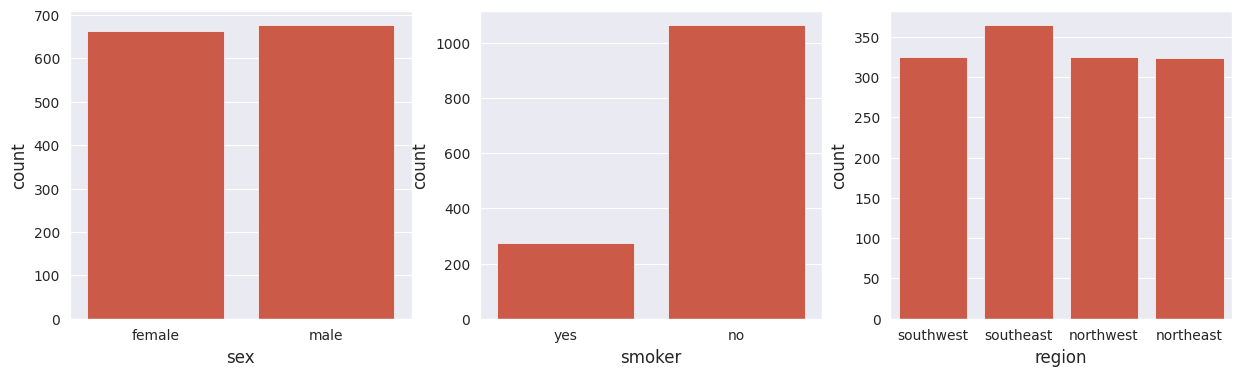

In [78]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.countplot(x='sex', data=df)

plt.subplot(1, 3, 2)
sns.countplot(x='smoker', data=df)

plt.subplot(1, 3, 3)
sns.countplot(x='region', data=df)

plt.show()

Análise dos gráficos:
- Sexo (sex): A quantidade de pessoas nos dois grupos de sexo é praticamente igual, o que sugere uma boa representatividade tanto de homens quanto de mulheres na amostra.

- Fumante (smoker): Observa-se que a maioria das pessoas não é fumante, com um número significativamente menor de fumantes.

- Região (region): As quatro regiões têm uma distribuição semelhante em termos de quantidade de indivíduos, sendo que a "southeast" possui um pouco mais que as demais.

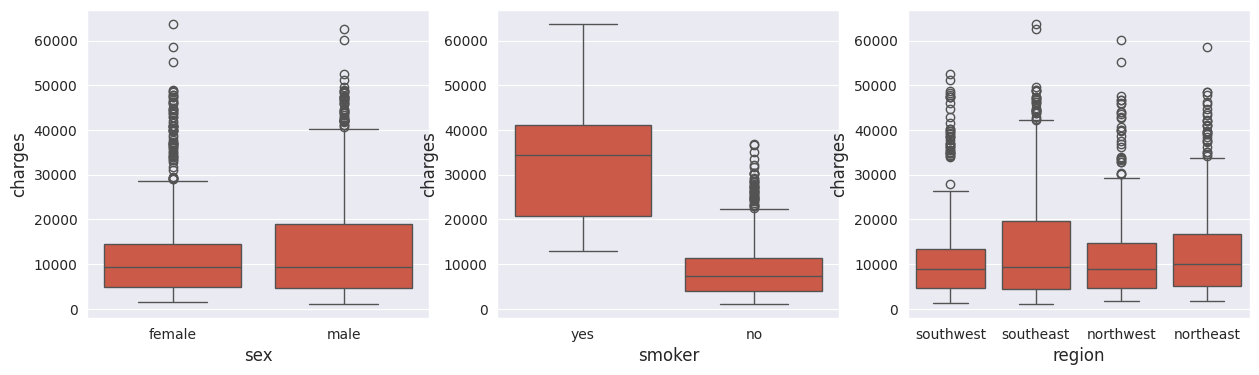

In [79]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.boxplot(x='sex', y='charges', data=df)

plt.subplot(1, 3, 2)
sns.boxplot(x='smoker', y='charges', data=df)

plt.subplot(1, 3, 3)
sns.boxplot(x='region', y='charges', data=df)

plt.show()

Análise dos gráficos:

- Sexo: Não há uma diferença clara nos custos de saúde entre homens e mulheres, indicando que ambos têm riscos semelhantes que afetam seus custos de saúde de forma equilibrada.

- Fumantes vs Não Fumantes: O impacto do tabagismo nos custos de saúde é evidente, com os fumantes apresentando custos médios muito mais elevados. Isso destaca como o tabagismo pode ser um importante fator de risco, aumentando significativamente os encargos médicos.

- Região: A localização geográfica tem um impacto limitado nos custos de saúde, com uma distribuição bastante uniforme entre as diferentes regiões. A exceção parece ser a região "southeast", que tem mais outliers.

#### Análise da distribuição das variáveis quantitativas ou numéricas

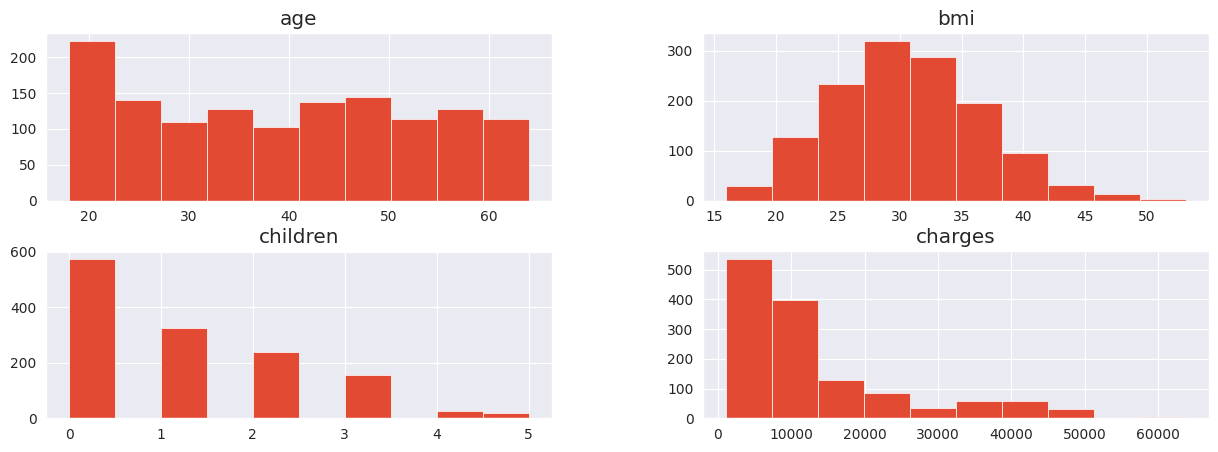

In [80]:
df.hist(figsize=(15, 5))
plt.show()

Análise dos gráficos:

- Idade (age): A distribuição é levemente enviesada para os mais jovens, com um pico em torno dos 20 anos. Há uma concentração menor em idades acima dos 50, mas ainda existe uma representação significativa de pessoas até 60 anos, o que reflete uma faixa etária adulta abrangente na amostra.

- Índice de Massa Corporal (BMI): A distribuição é aproximadamente normal, centrada em torno de 30, o que reforça o insight de uma média que se aproxima do sobrepeso. Há uma presença reduzida de valores extremos (muito baixos ou muito altos), indicando que a maioria dos indivíduos tem um BMI entre 25 e 35.

- Número de Filhos (Children): A maioria dos indivíduos não possui filhos, seguido por aqueles com 1 ou 2 filhos. Poucos indivíduos têm 4 ou 5 filhos, o que indica que famílias pequenas são predominantes na amostra.

- Cobrança Médica (Charges): A distribuição é altamente assimétrica, com a maioria das cobranças concentradas em valores mais baixos, abaixo de 20.000. Existem algumas cobranças muito elevadas, o que sugere a presença de casos com despesas médicas excepcionais, provavelmente relacionados a condições de saúde mais complexas ou fatores de risco (como idade avançada, alto BMI ou tabagismo).

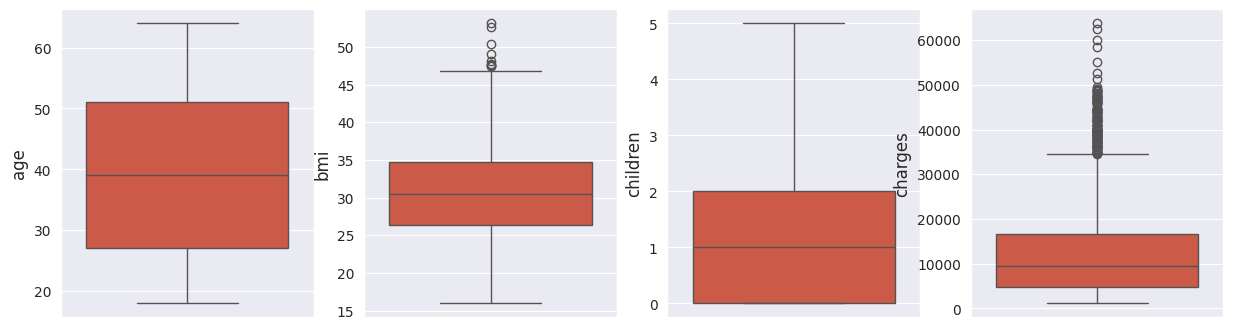

In [81]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 4, 1)
sns.boxplot(y='age', data=df)

plt.subplot(1, 4, 2)
sns.boxplot(y='bmi', data=df)

plt.subplot(1, 4, 3)
sns.boxplot(y='children', data=df)

plt.subplot(1, 4, 4)
sns.boxplot(y='charges', data=df)

plt.show()

Análise dos gráficos:

- Idade (age): A distribuição é relativamente simétrica, com a maioria dos valores entre 30 e 50 anos. Isso indica uma população adulta ativa, com uma faixa etária predominantemente entre os 30 e 50 anos.

- Índice de Massa Corporal (BMI): Os valores de BMI apresentam alguns outliers na faixa acima de 40, indicando a presença de indivíduos com obesidade grave na amostra. A mediana está em torno de 30, o que reforça a tendência ao sobrepeso ou obesidade para a maioria da população.

- Número de Filhos (Children): A maioria das pessoas tem entre 0 e 2 filhos, com poucos casos acima disso. Esse padrão reflete uma tendência para famílias pequenas, sendo raro encontrar indivíduos com mais de 3 filhos.

- Custo Médico (Charges):Existe uma quantidade significativa de outliers, indicando que uma pequena parcela da população possui despesas médicas muito altas.
A mediana das cobranças é relativamente baixa, mas os outliers sugerem casos de gastos elevados, provavelmente devido a condições de saúde que demandam mais atenção médica ou estilos de vida que implicam em maiores riscos (como sobrepeso e tabagismo).

#### Matriz de Correlação das variáveis numéricas

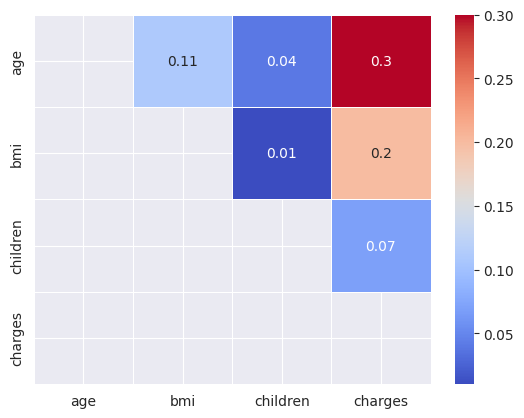

In [82]:
numeric_columns = ['age', 'bmi', 'children', 'charges']
correlation_matrix = df[numeric_columns].corr().round(2)
mask = np.tril(df[numeric_columns].corr())
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, cmap='coolwarm', mask=mask)

plt.show()

Análise da matriz de correlação:

- Idade (age): Existe uma correlação moderada positiva (0.3) entre idade e as despesas médicas (charges). Isso sugere que, conforme a idade aumenta, as despesas médicas também tendem a aumentar. Esse comportamento pode estar relacionado ao aumento de riscos e necessidades médicas com o envelhecimento.

- BMI: A correlação entre BMI e despesas médicas é de 0.2, indicando uma relação positiva, embora mais fraca. Pessoas com maior índice de massa corporal (sobrepeso ou obesidade) tendem a ter despesas médicas ligeiramente mais altas, possivelmente devido a condições de saúde associadas, como hipertensão ou diabetes.

- Filhos (children): A correlação entre o número de filhos e as despesas médicas é baixa (0.07), indicando que o número de filhos tem pouca influência sobre os custos médicos.

#### Transformando os dados categóricos para numéricos

In [83]:
# Variável que será usada para converter valores categóricos em numéricos através da técnica LabelEncoding
# Verificando os valores da coluna sex. Em seguida iremos transformar em binário (0 ou 1), pois possui somente 2 valores distintos.
label_encoder = LabelEncoder()

In [84]:
# Verificando os valores antes da transformação
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

Transforma os valores categóricos em numéricos da coluna sex

In [85]:
df['sex'] = label_encoder.fit_transform(df['sex'])

In [86]:
# Verifica após a transformação
df['sex'].value_counts()

sex
1    676
0    662
Name: count, dtype: int64

In [87]:
# Verificando os valores antes da transformação
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

Transforma os valores categóricos em numéricos da coluna smoker

In [88]:
df['smoker'] = label_encoder.fit_transform(df['smoker'])

In [89]:
# Verifica após a transformação
df['smoker'].value_counts()

smoker
0    1064
1     274
Name: count, dtype: int64

Converte a variável region para valores numéricos através da técnica OneHotEncoding

Essa técnica transforma cada valor distinto numa nova coluna binarizada (0 ou 1)

In [90]:
# Verificando os valores antes da transformação
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [91]:
one_hot_region = OneHotEncoder(sparse_output=False)
region_encoded = one_hot_region.fit_transform(df[['region']])
df = pd.concat([df, pd.DataFrame(data=region_encoded, columns=one_hot_region.get_feature_names_out())], axis=1)
df.drop(columns=['region'], axis=1, inplace=True)

In [92]:
# Verificando após a transformação
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0


Foram criadas novas colunas: region_norheast, region_northwest, region_southeast e region_southwest.

#### Matriz de correlação após a transformação dos campos

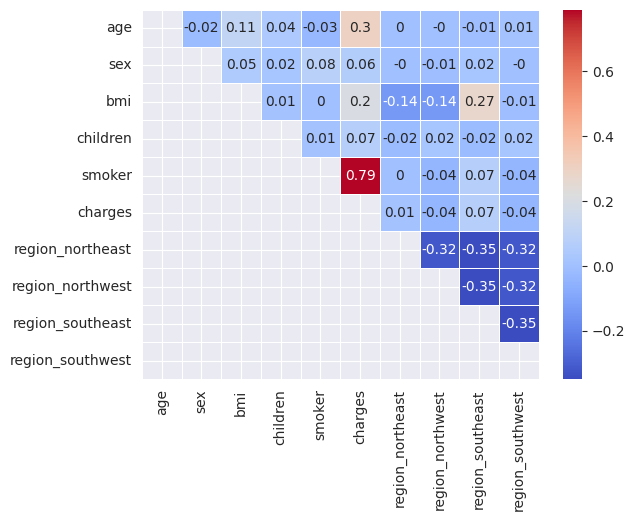

In [93]:
correlation_matrix = df.corr().round(2)
mask = np.tril(df.corr())
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, cmap='coolwarm', mask=mask)

plt.show()

Análise da matriz:

- Smoker: Existe uma forte correlação positiva (0.79) entre ser fumante e o valor das despesas médicas. Esse é o fator mais fortemente relacionado com os custos médicos, indicando que fumantes tendem a ter despesas significativamente maiores, possivelmente devido a doenças relacionadas ao tabagismo, como doenças respiratórias e cardiovasculares.

- Age: A correlação entre idade e despesas médicas continua moderada (0.3), sugerindo que o aumento da idade está associado a um crescimento das despesas, embora com menor impacto que o fator tabagismo.

- BMI: A relação entre BMI e despesas médicas é positiva, mas moderada (0.2), indicando que o aumento do índice de massa corporal pode contribuir para o aumento dos custos médicos, mas com impacto menor comparado ao tabagismo.

- Region: As regiões (region_northeast, region_northwest, region_southeast, region_southwest) apresentam correlações ligeiramente negativas com charges, variando entre -0.32 e -0.35. Isso indica que, em média, as despesas médicas podem ser um pouco menores em algumas regiões em comparação a outras, mas o efeito é relativamente fraco.

### Verificando melhor algoritmo com Validação Cruzada

A seguir vamos testar vários modelos de regressão para identificar o que tem o melhor desempenho

In [94]:
# Separa os dados entre variáveis preditoras (x) e variável alvo (y)
x = df.drop(columns=['charges'])
y = df['charges']

A seguir criamos uma função que recebe uma lista de modelos de regressão que queremos testar, as variáveis preditores, a variável alvo.
Também podemos passar por parâmetro o valor de quantos splits queremos que o cross validation aplique, por padrão é 10.

A função vai calcular as métricas de validação de modelos de regressão R2, RMSE e MAE para cada algoritmo a ser testado.

Além disso, para cada algoritmo será verificado os resultados onde as variáveis preditoras estarão sem transformação, com padronização e com normalização.

In [95]:
def run_models_with_cross_validation(models: list, x, y, n_splits=10):

    def get_model_results(model):
        kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)

        # Calcula as métricas de validação de modelos de regressão
        # r2, rmse e  mae
        def compute_metrics(y_true, y_pred):
            r2 = r2_score(y_true, y_pred)
            rmse = root_mean_squared_error(y_true, y_pred)
            mae = mean_absolute_error(y_true, y_pred)
            return r2, rmse, mae

        # Pipeline com dados sem transformação
        pipeline_original = Pipeline([
            ('model', model)
        ])
        y_pred_original = cross_val_predict(pipeline_original, x, y, cv=kfold)
        r2_original, rmse_original, mae_original = compute_metrics(y, y_pred_original)

        # Pipeline com padronização StandardScaler
        pipeline_std = Pipeline([
            ('scaler', StandardScaler()),
            ('model', model)
        ])
        y_pred_std = cross_val_predict(pipeline_std, x, y, cv=kfold)
        r2_std, rmse_std, mae_std = compute_metrics(y, y_pred_std)

        # Pipeline com normalização MinMaxScaler
        pipeline_mm = Pipeline([
            ('scaler', MinMaxScaler()),
            ('model', model)
        ])
        y_pred_mm = cross_val_predict(pipeline_mm, x, y, cv=kfold)
        r2_mm, rmse_mm, mae_mm = compute_metrics(y, y_pred_mm)

        return {
            'original': {'r2': r2_original, 'rmse': rmse_original, 'mae': mae_original},
            'std': {'r2': r2_std, 'rmse': rmse_std, 'mae': mae_std},
            'mm': {'r2': r2_mm, 'rmse': rmse_mm, 'mae': mae_mm}
        }

    results = []
    # Para cada modelo
    for name, model in models:
        print(f"Verificando modelo {name}")
        model_results = get_model_results(model)

        results.append({
            'model': name,
            'r2_original': model_results['original']['r2'],
            'r2_std': model_results['std']['r2'],
            'r2_mm': model_results['mm']['r2'],
            'rmse_original': model_results['original']['rmse'],
            'rmse_std': model_results['std']['rmse'],
            'rmse_mm': model_results['mm']['rmse'],
            'mae_original': model_results['original']['mae'],
            'mae_std': model_results['std']['mae'],
            'mae_mm': model_results['mm']['mae']
        })

    # retorna um dataframe para comparação dos resultados
    df = pd.DataFrame(data=results)

    return df


A seguir vamos chamar a função para verificar qual modelo se saiu melhor

In [96]:
df_results = run_models_with_cross_validation([
    ('LinearRegression', LinearRegression()),
    ('DecisionTreeRegressor', DecisionTreeRegressor(max_depth=4)),
    ('RandomForestRegressor', RandomForestRegressor(max_depth=4)),
    ('GradientBoostingRegressor', GradientBoostingRegressor()),
    ('KNeighborsRegressor', KNeighborsRegressor())
], x, y)

Verificando modelo LinearRegression
Verificando modelo DecisionTreeRegressor
Verificando modelo RandomForestRegressor
Verificando modelo GradientBoostingRegressor
Verificando modelo KNeighborsRegressor


In [97]:
df_results.head()

,model,r2_original,r2_std,r2_mm,rmse_original,rmse_std,rmse_mm,mae_original,mae_std,mae_mm
0,LinearRegression,0.747396,0.746946,0.747578,6084.187209,6089.602692,6081.986751,4204.827492,4214.055366,4203.749467
1,DecisionTreeRegressor,0.849443,0.848986,0.849443,4697.134280,4704.259336,4697.134280,2723.251980,2723.251980,2723.251980
2,RandomForestRegressor,0.858280,0.858139,0.858936,4557.199989,4559.469036,4546.642785,2557.967822,2562.366200,2557.451555
3,GradientBoostingRegressor,0.858737,0.858793,0.859063,4549.838413,4548.945412,4544.593767,2498.570211,2495.654656,2493.650931
4,KNeighborsRegressor,0.133400,0.794098,0.772063,11269.156524,5493.030306,5779.492251,7756.328940,3351.668150,3546.195712


A tabela acima mostra o desempenho de diferentes modelos de regressão em relação a várias métricas:

- R²: Mede o quão bem o modelo explica a variabilidade dos dados. Um valor mais próximo de 1 indica um melhor ajuste.
- RMSE (Root Mean Square Error): Mede o erro médio ao quadrado. Valores mais baixos indicam um ajuste melhor.
- MAE (Mean Absolute Error): Mede o erro absoluto médio entre previsões e valores reais. Valores menores indicam um melhor desempenho.

Para cada modelo e métrica, foi avalido o desempenho com base nas seguintes configurações dos dados:

- Original: Valores sem normalização ou padronização.
- Std: Valores após padronização.
- MM: Valores após normalização (min-max scaling).


Análise do resultado dos modelos:

- Linear Regression: R² médio em torno de 0.747, com um RMSE em torno de 6081 e MAE em torno de 4203. Desempenho inferior em comparação aos modelos de árvore de decisão e ensemble.

- Decision Tree Regressor: R² médio de aproximadamente 0.849, com um RMSE em torno de 4697 e MAE em torno de 2723. Melhor que a regressão linear, mas não o melhor em comparação com Random Forest e Gradient Boosting.

- Random Forest Regressor: R² médio em torno de 0.858, com RMSE em torno de 4549 e MAE em torno de 2553. Melhor desempenho geral em termos de RMSE e MAE.

- Gradient Boosting Regressor: R² médio de aproximadamente 0.859, RMSE em torno de 4548 e MAE em torno de 2497. Desempenho similar ao Random Forest, com uma ligeira vantagem no MAE, indicando um ajuste ligeiramente mais preciso.

- KNeighbors Regressor: R² médio mais baixo (0.772) e um RMSE muito alto em comparação com os outros modelos (acima de 5779). Este modelo tem o pior desempenho em termos de precisão entre todos.

Conclusão:

Gradient Boosting Regressor e Random Forest Regressor apresentam os melhores desempenhos, com R² próximos de 0.859 e RMSE e MAE mais baixos. O Gradient Boosting Regressor leva uma pequena vantagem, especialmente no MAE, sugerindo que ele fornece previsões ligeiramente mais precisas. Portanto, o Gradient Boosting Regressor pode ser considerado o melhor modelo para este conjunto de dados, seguido de perto pelo Random Forest Regressor. Entretanto, como vimos nas aulas o RandomForestRegressor, vamos optar por este modelo como sendo o melhor.

Com relação aos dados, o desempenho foi praticamente o mesmo em todas as abordagens. Isso se deve ao fato de que esses modelos de Decision Tree, Random Forest e Gradient Boosting não são sensíveis à escala dos dados. Então vamos optar por usar o StandardScaler.


#### Fine Tunning do modelo Random Forest

A seguir criamos uma função para tentar encontrar a melhor combinação de hiperparâmetros do algoritmo RandomForestRegressor utilizando a técnica de GridSearchCV.

In [98]:
def search_best_hyperparameters(x, y):

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Pipeline que usa StandardScaler e Random Forest
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('rf', RandomForestRegressor())
    ])

    # Definir a grade de parâmetros para buscar os melhores hiperparâmetros
    param_grid = {
        'rf__max_depth': [None, 2, 3, 4, 5],
        'rf__max_features': [1, 2, 3, 4, 5, ],
        'rf__min_samples_leaf': [1, 2, 4],
        'rf__min_samples_split': [2, 5, 10],
        # 'rf__n_estimators': [100, 200]
    }

    # Configurar o GridSearchCV
    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')

    # Treinar o modelo com a busca em grade
    grid_search.fit(X_train, y_train)

    # Obter os melhores parâmetros
    best_params = grid_search.best_params_
    print("Melhores parâmetros encontrados:", best_params)

    # Avaliar o modelo com os melhores parâmetros
    y_pred = grid_search.best_estimator_.predict(X_test)

    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Imprime as métricas de avaliação do modelo
    print("RMSE", rmse)
    print("MAE", mae)
    print("R2:", r2)

In [99]:
search_best_hyperparameters(x, y)

Melhores parâmetros encontrados: {'rf__max_depth': 5, 'rf__max_features': 5, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 5}
RMSE 4391.761191367413
MAE 2650.1272943080794
R2: 0.8757634527724115


Após executar a função que tentou buscar os melhores hiperparâmetros, fechamos na combinação acima.

Portanto, vamos utilizar esses valores nos próximos passos de treinamento e validação do modelo.

### Treinamento do modelo escolhido 

Escolhemos o algoritmo Random Forest Regressor, pois foi um dos que teve melhor desempenho.

Vamos separar os dados entre treino e teste, aplicar a padronização dos dados e treinar o modelo

In [100]:
# Separa dados de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"Linhas para treino: {len(X_train)}")
print(f"Linhas para teste: {len(X_test)}")

Linhas para treino: 1070
Linhas para teste: 268


Vamos criar um pipeline para aplicar a padronização dos dados das variáveis preditoras e que treine o modelo em seguida.

In [101]:
# TODO: criar um pipeline que tranforme os dados categoriais em numéricos

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=5, random_state=42))
])

Treinando o modelo com base no pipeline criado

In [102]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestRegressor(max_depth=5, max_features=5,
                                       min_samples_leaf=2, min_samples_split=5,
                                       random_state=42))])

Verificando o resultado das predições

In [103]:
y_pred = pipeline.predict(X_test)

# Lista as primeiras 10 linhas
y_pred[:10]

array([10650.70956773,  5707.23371137, 27666.87430827, 10466.43730361,
       34777.64409276,  6146.49530562,  3538.36466877, 14785.0474403 ,
        5804.08901484, 11061.94857787])

Verificando as métricas de validação do modelo

In [104]:
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print (f'R2: {r2}')
print (f'RMSE: {rmse}')
print (f'MAE: {mae}')

R2: 0.8753372309154961
RMSE: 4399.288211133832
MAE: 2582.612917958174


TODO: explicar os resultados

Plotando o gráfico que mostra os valores reais versus os valores previstos

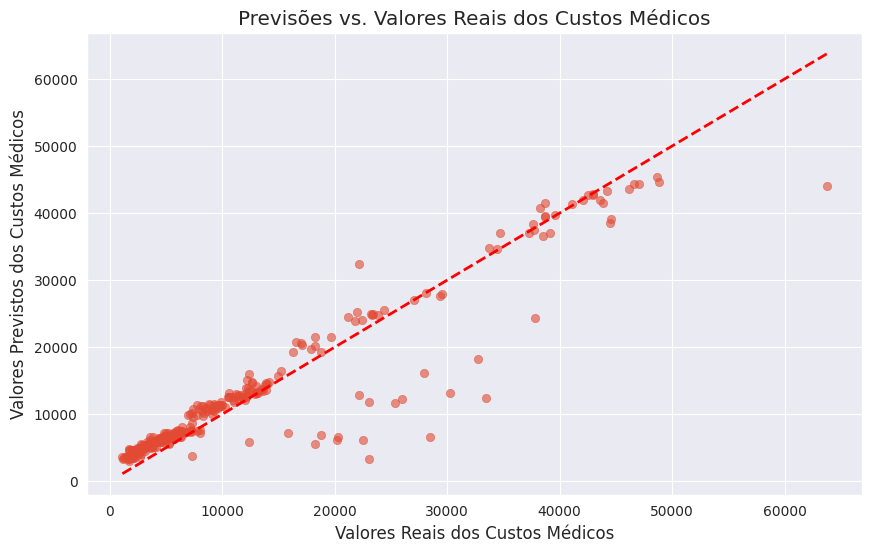

In [105]:
def plot_real_vs_pred(y_test, y_pred):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Valores Reais dos Custos Médicos')
    plt.ylabel('Valores Previstos dos Custos Médicos')
    plt.title('Previsões vs. Valores Reais dos Custos Médicos')
    plt.show()

plot_real_vs_pred(y_test, y_pred)

Verificando a distribuição dos erros

In [106]:
df_errors = pd.DataFrame(zip(y_test, y_pred, np.abs(y_test - y_pred)), columns = ['y_test', 'y_pred', 'error'])
df_errors['pct_error'] = df_errors['error'] / df_errors['y_test']
df_errors.nlargest(10, 'pct_error')

,y_test,y_pred,error,pct_error
29,1131.5066,3578.417849,2446.911249,2.162525
152,1146.7966,3268.370399,2121.573799,1.850000
105,1727.5400,4881.994214,3154.454214,1.825980
22,1256.2990,3468.227655,2211.928655,1.760671
51,1719.4363,4622.027091,2902.590791,1.688106
80,1391.5287,3574.002212,2182.473512,1.568400
129,1837.2819,4683.528697,2846.246797,1.549162
230,1534.3045,3761.622248,2227.317748,1.451679
115,1980.0700,4643.192175,2663.122175,1.344964
123,1986.9334,4607.515269,2620.581869,1.318908


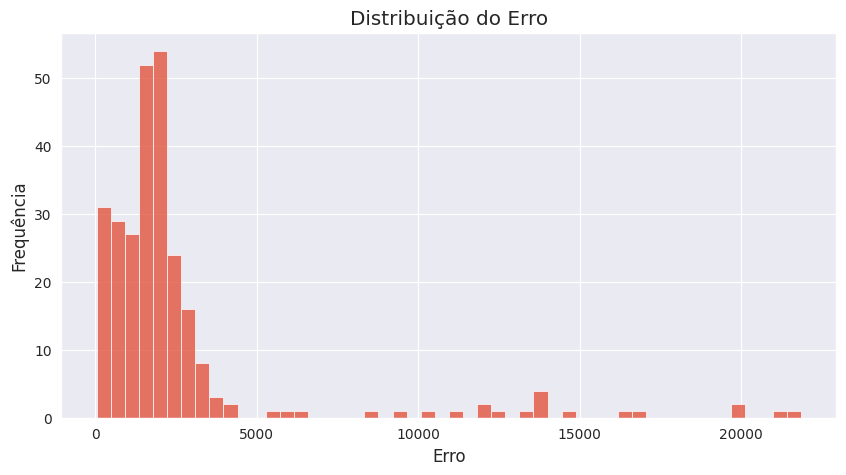

In [107]:
def plot_error_distribution(error):
    plt.figure(figsize=(10, 5))
    sns.histplot(error, bins=50)
    plt.xlabel('Erro')
    plt.ylabel('Frequência')
    plt.title('Distribuição do Erro')
    plt.show()
    
plot_error_distribution(df_errors['error'])

Análise do gráfico de erros

- 

#### Salvando o modelo

Para usar em produção, podemos salvar o modelo como tipo "pickle" para ser reutilizado para realizar predições

In [109]:
with open('dados/pipeline_model.pkl', 'wb') as arquivo:
    pickle.dump(pipeline, arquivo)